# Final Projects - House Price Prediction
---
Team members:
- Lê Quốc An
- Nguyễn Công Tiến Dũng
- Lư Xuân Dương
- Nguyễn Đức Hiệp
---

## Phần 1: Identify the problem:
Việc mua bán nhà chưa bao giờ là hết phổ biến nhưng để có thể đưa ra được nhận định giá cho người bán và người mua, hay hỗ trợ trong các tư vấn tài chính như các khoản vay giúp giảm thiểu rủi ro trong đầu tư bất động sản thì mỗi cá nhân rất khó để phân tích và xử lí một nguồn dữ liệu lớn và đưa ra quyết định hợp lí.

Để giải quyết được vấn đề đó thì việc xây dựng một mô hình dự đoán giá nhà có thể giúp cho định giá chính xác hơn từ việc thu thập các dữ liệu bất động sản thu thấp được trên website về rao bán bất động sản.

**Phương pháp:**

 **1. Thu thập và tiền xử lý dữ liệu:**

 Thu thập dữ liệu từ nhiều nguồn khác nhau như trang web bất động sản, hồ sơ chính phủ và danh sách tài sản.
 Làm sạch dữ liệu bằng cách loại bỏ các giá trị trùng lặp, giá trị ngoại lệ và giá trị bị thiếu.
 Xử lý trước dữ liệu bằng cách chia tỷ lệ các tính năng số và mã hóa các tính năng phân loại.

**2. Lựa chọn mô hình phù hợp:**

 Chọn mô hình học máy phù hợp cho các vấn đề hồi quy, chẳng hạn như Hồi quy tuyến tính, Rừng ngẫu nhiên hoặc XGBoost.
 Huấn luyện mô hình trên dữ liệu đã được xử lý trước.
 Đánh giá hiệu suất của mô hình bằng cách sử dụng các số liệu như sai số bình phương trung bình (MSE) và bình phương R.
 Điều chỉnh các siêu tham số của mô hình để cải thiện hiệu suất của nó.

 **3. Feature Engineering:**

 Tạo các tính năng mới dựa trên các tính năng hiện có.
 Chọn các tính năng phù hợp nhất bằng cách sử dụng các kỹ thuật như phân tích tương quan hoặc tầm quan trọng của tính năng.

**4. Training và đánh giá mô hình:**

 Huấn luyện mô hình đã chọn trên dữ liệu được xử lý trước và các tính năng đã chọn.
 Đánh giá hiệu suất của mô hình bằng cách sử dụng các số liệu như MSE và R bình phương.
#So sánh hiệu suất của các mô hình khác nhau và chọn mô hình hoạt động tốt nhất.

## Phần 2: Implimplementation:

### 2.1 Data collection: Gộp các file dữ liệu sau khi crawl xong

Các data thu thập từ website:[batdongsan](https://batdongsan.vn/ban-nha/) đã được crawl và xử lí bằng các file code được gửi trong folder Crawl Data

In [193]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
import seaborn as sns

In [194]:

path = 'D:/Daniel/Lab_KHDL/Final_Project/Data/'
frames = []   
for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        df1 = pd.read_csv(file_path, encoding='utf-8-sig')
        frames.append(df1)

result = pd.concat(frames, ignore_index=True)

result.to_csv('dataFinal.csv', index=False, encoding='utf-8-sig')

### 2.2 Data preprocessing

#### 2.2.1 Xử lí các dữ liệu bị thiếu, trùng lặp trong tập dữ liệu thu được 

In [283]:
df = pd.read_csv('D:\Daniel\Lab_KHDL\Final_Project\dataFinal.csv')
df.head()

,Tiêu đề,Diện tích(m2),Số phòng ngủ,Số phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Hướng nhà,Hướng ban công,Loại nhà,Giá,Link
0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...,150.0,2.0,1.0,10/12/2023,TP Hồ Chí Minh,Nhà Bè,NaN,NaN,Bán Nhà riêng,3.899000e+09,https://batdongsan.vn/chua-toi-30trm2-hang-ngo...
1,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ...",51.0,NaN,NaN,10/12/2023,TP Hồ Chí Minh,Tân Bình,NaN,NaN,Bán Nhà riêng,5.500000e+00,https://batdongsan.vn/ban-nha-hxh-au-co-phuong...
2,"SÁT MẶT TIỀN PHAN ĐĂNG LƯU, PHƯỜNG 7, PHÚ NHUẬ...",45.0,2.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,NaN,NaN,Bán Nhà,4.600000e+00,https://batdongsan.vn/sat-mat-tien-phan-dang-l...
3,CHỦ GẤP BÁN TRƯỚC TẾT LÊ HỒNG PHONG QUẬN 5 RA ...,41.0,NaN,NaN,10/12/2023,TP Hồ Chí Minh,Quận 5,NaN,NaN,Bán Nhà riêng,7.350000e+00,https://batdongsan.vn/chu-gap-ban-truoc-tet-le...
4,"LŨY BÁN BÍCH,TÂN PHÚ-DIỆN TÍCH KHỦNG 96M2 ( 4....",96.0,2.0,1.0,07/12/2023,TP Hồ Chí Minh,Tân Phú,NaN,NaN,Bán Nhà riêng,NaN,https://batdongsan.vn/luy-ban-bichtan-phu-dien...


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9809 entries, 0 to 9808
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         9805 non-null   object 
 1   Diện tích(m2)   8863 non-null   float64
 2   Số phòng ngủ    6125 non-null   float64
 3   Số phòng WC     5577 non-null   float64
 4   Thời gian đăng  9805 non-null   object 
 5   Tỉnh/Thành      9804 non-null   object 
 6   Quận/Huyện      9804 non-null   object 
 7   Hướng nhà       1341 non-null   object 
 8   Hướng ban công  851 non-null    object 
 9   Loại nhà        9804 non-null   object 
 10  Giá             8798 non-null   float64
 11  Link            9809 non-null   object 
dtypes: float64(4), object(8)
memory usage: 919.7+ KB


In [285]:
# Loai bo giá trị trùng lặp
df = df.drop_duplicates(subset='Tiêu đề', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8948 entries, 0 to 9808
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         8947 non-null   object 
 1   Diện tích(m2)   8177 non-null   float64
 2   Số phòng ngủ    5657 non-null   float64
 3   Số phòng WC     5138 non-null   float64
 4   Thời gian đăng  8947 non-null   object 
 5   Tỉnh/Thành      8946 non-null   object 
 6   Quận/Huyện      8946 non-null   object 
 7   Hướng nhà       1244 non-null   object 
 8   Hướng ban công  789 non-null    object 
 9   Loại nhà        8946 non-null   object 
 10  Giá             8012 non-null   float64
 11  Link            8948 non-null   object 
dtypes: float64(4), object(8)
memory usage: 908.8+ KB


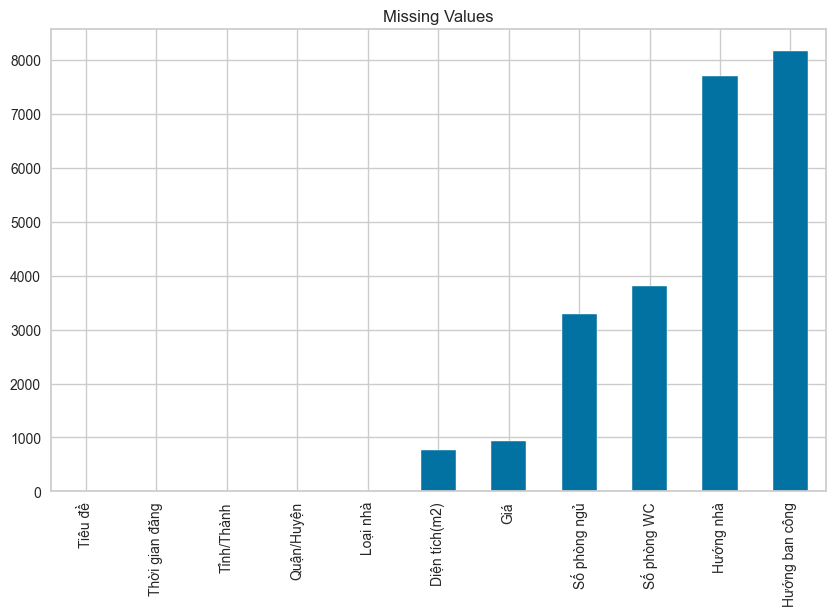

In [286]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10, 6))
missing.plot.bar()
plt.title('Missing Values')
plt.show()

In [287]:
df = df.dropna(subset=['Giá'])
df = df.dropna(subset=['Diện tích(m2)'])
df = df.dropna(subset=['Số phòng ngủ'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5346 entries, 0 to 9808
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         5346 non-null   object 
 1   Diện tích(m2)   5346 non-null   float64
 2   Số phòng ngủ    5346 non-null   float64
 3   Số phòng WC     4744 non-null   float64
 4   Thời gian đăng  5346 non-null   object 
 5   Tỉnh/Thành      5346 non-null   object 
 6   Quận/Huyện      5346 non-null   object 
 7   Hướng nhà       1102 non-null   object 
 8   Hướng ban công  736 non-null    object 
 9   Loại nhà        5346 non-null   object 
 10  Giá             5346 non-null   float64
 11  Link            5346 non-null   object 
dtypes: float64(4), object(8)
memory usage: 543.0+ KB


In [288]:
df['Số phòng WC'].unique()

array([  1.,   2.,   3.,   6.,   5.,   8.,   4.,  88.,  12.,  nan,  14.,
        10.,   7.,  15.,  13.,   9.,  28.,  19.,  20.,  24.,  11.,  48.,
        23.,  16.,  18.,  36.,  21., 127.,  22.,  38.,  26.,  17., 111.])

In [289]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

df['Số phòng WC'] = knn_imputer.fit_transform(df[['Số phòng WC']]).astype(int)

missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
  print('All missing values have been imputed.')
else:
  print('There are still missing values in the following columns:')
  print(missing)


There are still missing values in the following columns:
Hướng nhà         4244
Hướng ban công    4610
dtype: int64


In [290]:
df['Số phòng WC'].unique()

array([  1,   2,   3,   6,   5,   8,   4,  88,  12,  14,  10,   7,  15,
        13,   9,  28,  19,  20,  24,  11,  48,  23,  16,  18,  36,  21,
       127,  22,  38,  26,  17, 111])

#### 2.2.2 Lựa chọn các Features có liên quan đến việc dự đoán giá nhà

In [291]:
df = df.drop(['Tiêu đề', 'Hướng nhà', 'Hướng ban công', 'Link'], axis=1)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5346 entries, 0 to 9808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diện tích(m2)   5346 non-null   float64
 1   Số phòng ngủ    5346 non-null   float64
 2   Số phòng WC     5346 non-null   int32  
 3   Thời gian đăng  5346 non-null   object 
 4   Tỉnh/Thành      5346 non-null   object 
 5   Quận/Huyện      5346 non-null   object 
 6   Loại nhà        5346 non-null   object 
 7   Giá             5346 non-null   float64
dtypes: float64(3), int32(1), object(4)
memory usage: 355.0+ KB


#### 2.2.3 Feature Engineering

In [293]:
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[object])
print(numeric_features.columns)
print(categorical_features.columns)

Index(['Diện tích(m2)', 'Số phòng ngủ', 'Số phòng WC', 'Giá'], dtype='object')
Index(['Thời gian đăng', 'Tỉnh/Thành', 'Quận/Huyện', 'Loại nhà'], dtype='object')


In [294]:
correlation = numeric_features.corr()
correlation['Giá'].sort_values(ascending=False)

Giá              1.000000
Diện tích(m2)    0.991810
Số phòng WC      0.009669
Số phòng ngủ     0.004224
Name: Giá, dtype: float64

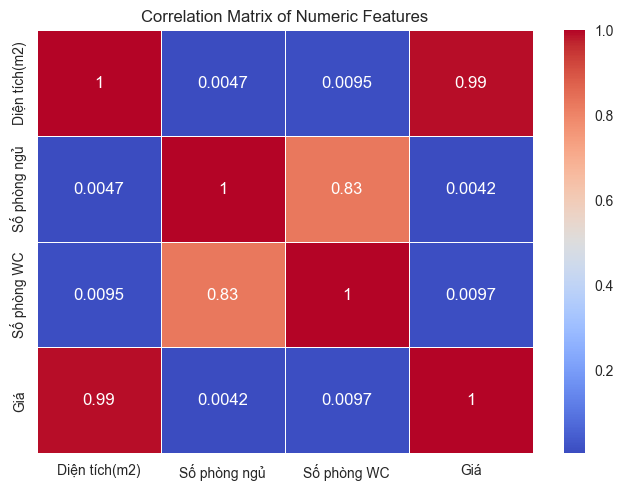

In [295]:

sns.heatmap(correlation, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


<Axes: ylabel='Số phòng ngủ'>

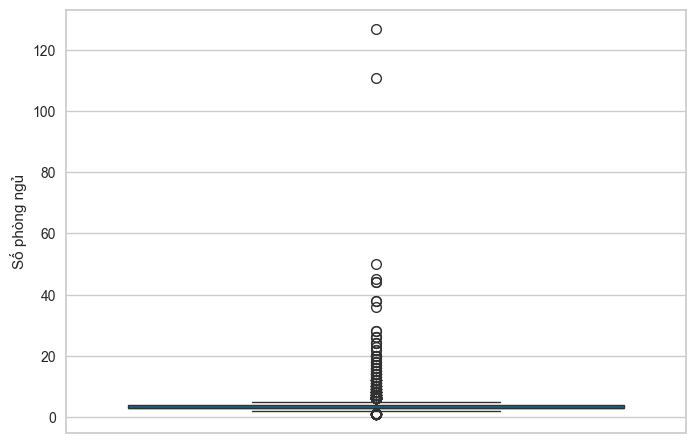

In [296]:
sns.boxplot(df['Số phòng ngủ'])

<Axes: ylabel='Số phòng WC'>

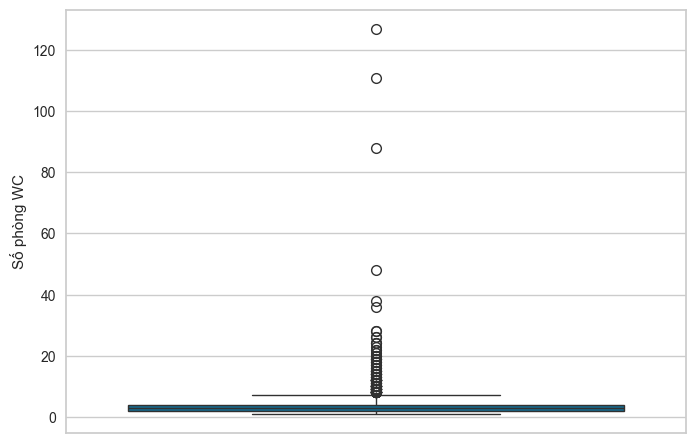

In [297]:
sns.boxplot(df['Số phòng WC'])

Text(0.5, 1.0, 'Số phòng WC vs Số phòng ngủ')

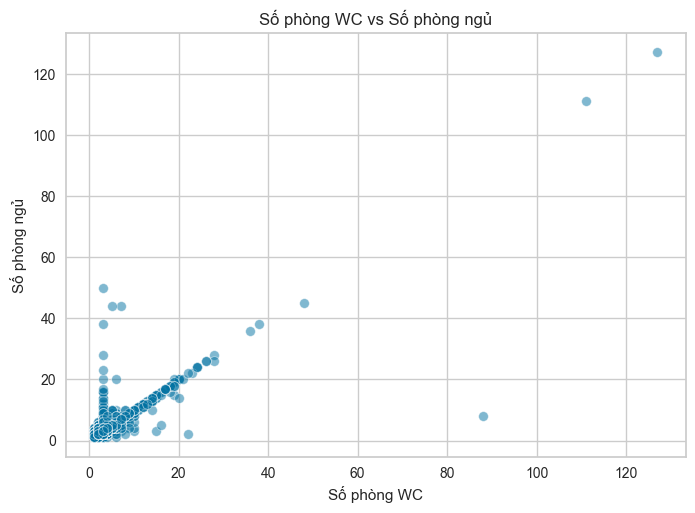

In [298]:
sns.scatterplot(x=df['Số phòng WC'], y=df['Số phòng ngủ'], alpha=0.5)
plt.xlabel('Số phòng WC')
plt.ylabel('Số phòng ngủ')
plt.title('Số phòng WC vs Số phòng ngủ')

In [299]:
Q1 = df['Diện tích(m2)'].quantile(0.25)
Q3 = df['Diện tích(m2)'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df = df[df['Diện tích(m2)'] <= upper_bound]

In [300]:
df = df[df['Số phòng WC'] <= 80]
df = df[df['Số phòng ngủ'] <= 80]

Text(0.5, 1.0, 'Diện tích vs Số phòng ngủ')

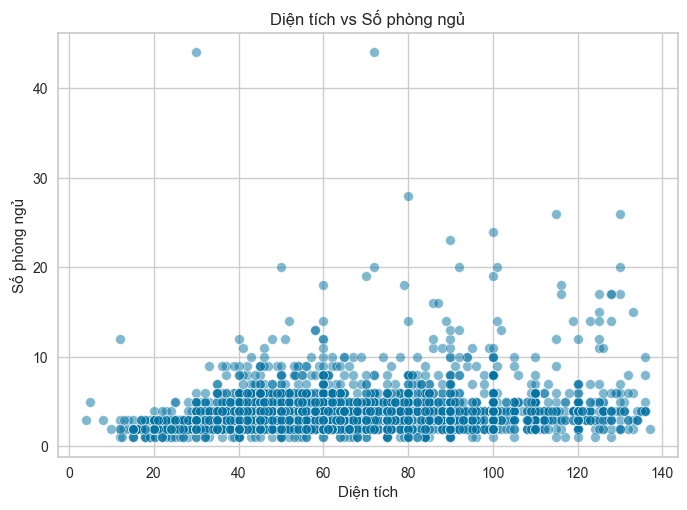

In [301]:
sns.scatterplot(x=df['Diện tích(m2)'], y=df['Số phòng ngủ'], alpha=0.5)
plt.xlabel('Diện tích')
plt.ylabel('Số phòng ngủ')
plt.title('Diện tích vs Số phòng ngủ')

- Xu hướng chung: Có một xu hướng tăng nhẹ trong số lượng phòng ngủ khi diện tích tăng lên. Tuy nhiên, mối quan hệ này không mạnh mẽ và có nhiều biến động. Điều này cho thấy diện tích không phải là yếu tố duy nhất quyết định số lượng phòng ngủ.
- Tập trung: Phần lớn các căn nhà có diện tích dưới 120m2 và số phòng ngủ dưới 20. Có rất ít căn nhà có diện tích lớn hơn 120m2 và số phòng ngủ lớn hơn 20.
- Ngoại lệ: Có một vài trường hợp ngoại lệ, ví dụ như căn nhà có diện tích khoảng 120m2 nhưng có tới hơn 120 phòng ngủ. Đây có thể là lỗi dữ liệu hoặc một trường hợp đặc biệt.

In [302]:
df.shape

(5034, 8)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24596\31955152.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Giá', ylabel='Density'>

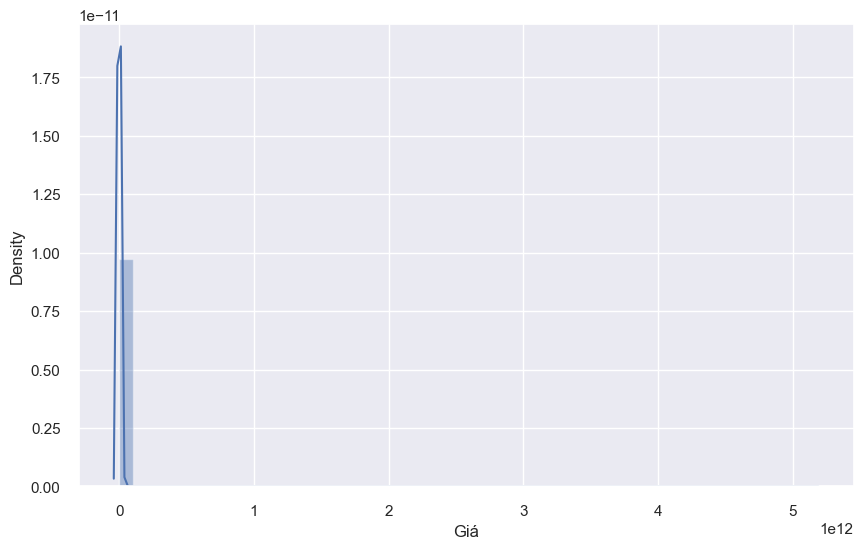

In [303]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(df['Giá'])

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24596\2316803391.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Giá', ylabel='Density'>

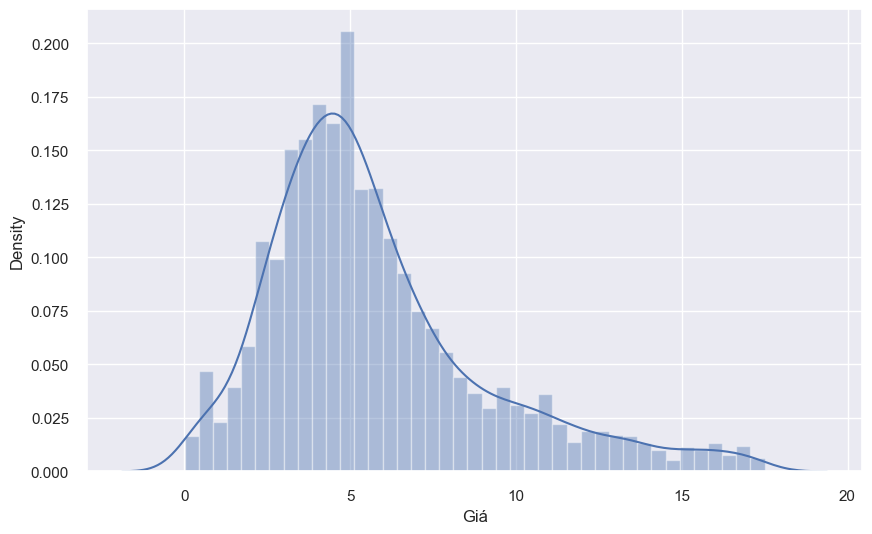

In [304]:
Q1 = df['Giá'].quantile(0.25)
Q3 = df['Giá'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df = df[df['Giá'] <= upper_bound]

sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(df['Giá'])

### 2.3 Vẽ biểu đồ trực quan trên bản đồ Việt Nam vè giá 1m2 trên mỗi tỉnh thành

##### **Trực quan biểu đồ mật độ hạt về mật độ ví trí bán nhều nhà nhất trên trang web**

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import plotly.express as px

In [306]:
with urlopen('https://raw.githubusercontent.com/xuanDuongmaidink/Duong20232024_khdl/main/ab.json') as response:
    data_json = json.load(response)

In [307]:
from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/Daniz2k3/KHDL_Project/main/vietnam-with-regions_%20(1).geojson') as response:
    data1_json = json.load(response)

In [308]:
grouped_data = df.groupby("Tỉnh/Thành").size()
MatDo_df = grouped_data.reset_index(name="Số lượng")

MatDo_df

,Tỉnh/Thành,Số lượng
0,An Giang,1
1,Bà Rịa Vũng Tàu,2
2,Bình Dương,160
3,Bình Định,3
4,Bắc Ninh,1
5,Cần Thơ,4
6,Hà Nội,1331
7,Hưng Yên,2
8,Hải Phòng,152
9,Khánh Hòa,23


In [309]:
rgb_colors = [
    [247,252,253],  
    [229,245,249],  
    [204,236,230],  
    [153,216,201],  
    [102,194,164], 
    [65,174,118],
    [35,139,69] ,
    [0,88,36]
]

color_levels = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 1]
rgb_color_scale = [[level, f"#{r:02x}{g:02x}{b:02x}"] for level, (r, g, b) in zip(color_levels, rgb_colors)]

In [310]:
state_id_map = {}
for i in range(0, 63): # Do nước ta có 63 tỉnh / thành
    ten_tinh = data1_json['features'][i]['properties']['name']
    id = data1_json['features'][i]['id']
    # Lấy tọa độ
    toa_do = data1_json['features'][i]['geometry']['coordinates'][0][0]
    x_toa_do = np.mean([toa_do_con[0] for toa_do_con in toa_do])  # Tính kinh độ trung bình
    y_toa_do = np.mean([toa_do_con[1] for toa_do_con in toa_do])    # Tính vĩ độ trung bình
    state_id_map[ten_tinh] = {'id': id, 'x_toa_do': x_toa_do, 'y_toa_do': y_toa_do}


In [311]:

MatDo_df["lat"] = MatDo_df["Tỉnh/Thành"].apply(lambda x: state_id_map[x]['x_toa_do'] )
MatDo_df["long"] = MatDo_df["Tỉnh/Thành"].apply(lambda x: state_id_map[x]['y_toa_do'] )

In [312]:
import geopandas as gpd
import geoplot
vietnam = gpd.GeoDataFrame.from_features(data_json['features'])

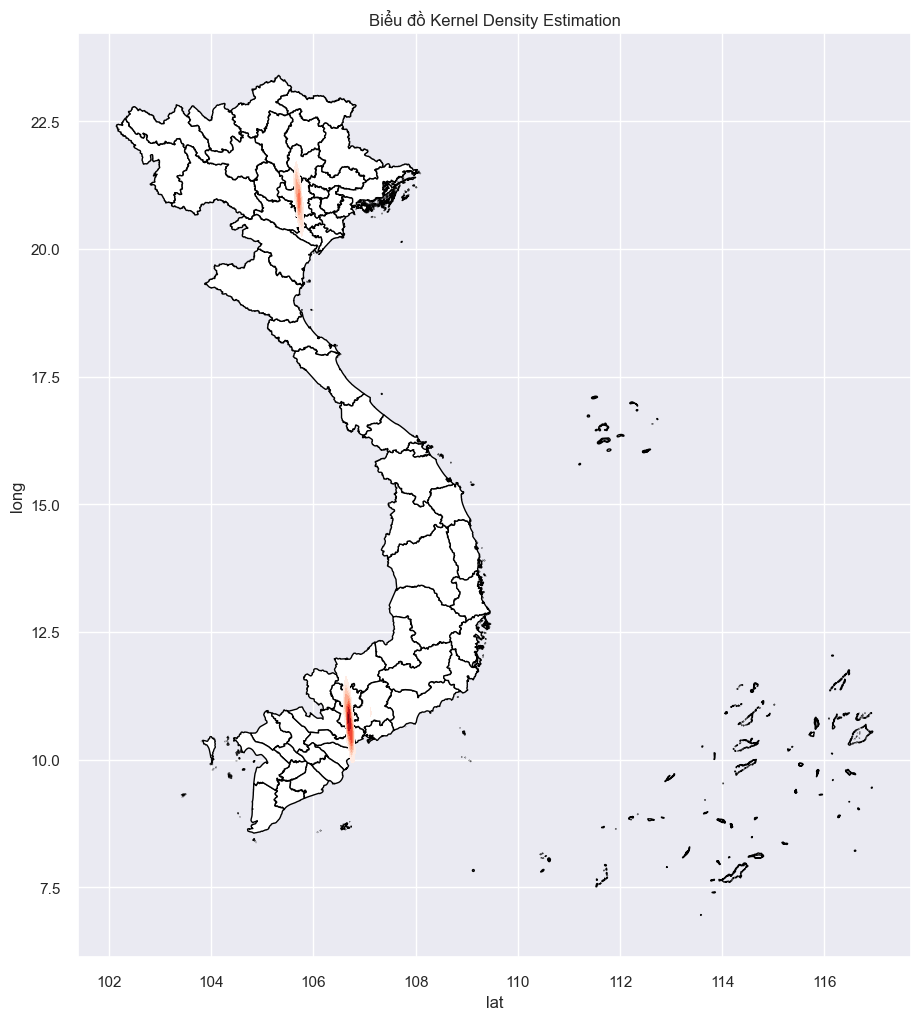

In [313]:
fig, ax = plt.subplots(figsize=(16, 12))
vietnam.plot(ax=ax, color='white', edgecolor='black')

# Adjusted KDE plot parameters
sns.kdeplot(
    data=MatDo_df, x='lat', y='long', weights='Số lượng', 
    cmap='Reds', levels=10, bw_adjust=0.07, fill=True, thresh=.2, gridsize=100 
)
plt.title("Biểu đồ Kernel Density Estimation")
# Display the plot
plt.show()

**Mật độ rao bán tập trung ở hai khu vực chính:**

- Khu vực phía Bắc, là Hà Nội và và các tỉnh lân cận.
- Khu vực phía Nam, là Thành phố Hồ Chí Minh và các tỉnh lân cận.
- Mật độ rao bán giảm dần khi ra xa hai trung tâm này: Các khu vực khác trên cả nước có mật độ rao bán nhà thấp hơn đáng kể.
- Không có dữ liệu cho một số khu vực: Một số khu vực trên bản đồ không có dữ liệu, có thể là do không có tin rao bán hoặc không có dữ liệu thu thập được.


Nhận xét chung:

Biểu đồ cho thấy sự tập trung rõ rệt của thị trường bất động sản tại hai thành phố lớn nhất cả nước là Hà Nội và Thành phố Hồ Chí Minh. Điều này phản ánh sự phát triển kinh tế và nhu cầu nhà ở cao tại hai khu vực này. Các khu vực khác có thể có tiềm năng phát triển nhưng chưa thu hút được sự quan tâm lớn từ thị trường bất động sản.

In [314]:
grouped_data = df.groupby("Tỉnh/Thành").apply(lambda x: x['Giá'].sum() *1000 / x['Diện tích(m2)'].sum())
TinhThanh_df = grouped_data.reset_index()
TinhThanh_df.columns.values[1] = "Triệu/m2"
TinhThanh_df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24596\783171740.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Tỉnh/Thành,Triệu/m2
0,An Giang,1.000000
1,Bà Rịa Vũng Tàu,74.230769
2,Bình Dương,42.838351
3,Bình Định,52.173913
4,Bắc Ninh,45.555556
5,Cần Thơ,28.782288
6,Hà Nội,140.485089
7,Hưng Yên,125.862069
8,Hải Phòng,103.394564
9,Khánh Hòa,61.300949


In [315]:
# Cập nhật dữ liệu ở hàng thứ hai (index 1) và cột 'Tỉnh/Thành'
TinhThanh_df.loc[1, 'Tỉnh/Thành'] = 'Bà Rịa - Vũng Tàu'
TinhThanh_df.loc[15, 'Tỉnh/Thành'] = 'Hồ Chí Minh city'
TinhThanh_df.loc[16, 'Tỉnh/Thành'] = 'Thừa Thiên - Huế'

In [316]:
import json
import plotly.express as px
import plotly.io as pio

In [317]:
# Mở file với mã hóa utf-8
with open("vietnam-with-regions_.geojson", 'r', encoding='utf-8') as f:
    try:
        # Đọc nội dung của file JSON
        vietnam = json.load(f)
        # In ra một phần nội dung để kiểm tra
    except Exception as e:
        print("Đã xảy ra lỗi:", str(e))

In [318]:
vietnam['features'][59]

{'type': 'Feature',
 'id': '10730',
 'properties': {'name': 'Tuyên Quang',
  'density': 0,
  'path': '/world/Vietnam/Tuyên Quang'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[105.459328, 22.283989],
     [105.430656, 22.214579],
     [105.492737, 22.151014],
     [105.462151, 22.074572],
     [105.504364, 21.992462],
     [105.554886, 21.957626],
     [105.552055, 21.908506],
     [105.517609, 21.87665],
     [105.527382, 21.835468],
     [105.49305, 21.827827],
     [105.493721, 21.774923],
     [105.524406, 21.765766],
     [105.476715, 21.697285],
     [105.495819, 21.618572],
     [105.541733, 21.573984],
     [105.520622, 21.535192],
     [105.422676, 21.49773],
     [105.370522, 21.524696],
     [105.303581, 21.507738],
     [105.225418, 21.629765],
     [105.234657, 21.658876],
     [105.055809, 21.747625],
     [105.099525, 21.812189],
     [105.013687, 21.898186],
     [105.018394, 21.935863],
     [104.985695, 21.936575],
     [104.996902, 22.043011],
     [10

In [319]:
vietnam['features'][0]['properties']['name']

'An Giang'

In [320]:
state_id_map = {}
for i in range(0,63):
    state_id_map[vietnam['features'][i]['properties']['name']] = vietnam['features'][i]['id']

In [321]:
state_id_map

{'An Giang': '10732',
 'Bắc Giang': '10700',
 'Bắc Kạn': '10724',
 'Bạc Liêu': '10712',
 'Bắc Ninh': '10701',
 'Bà Rịa - Vũng Tàu': '10716',
 'Bến Tre': '10735',
 'Bình Định': '10733',
 'Bình Dương': '10692',
 'Bình Phước': '10688',
 'Bình Thuận': '10689',
 'Cà Mau': '10690',
 'Cần Thơ': '10736',
 'Cao Bằng': '10702',
 'Đắk Lắk': '10695',
 'Đăk Nông': '10703',
 'Đà Nẵng': '10709',
 'Điện Biên': '10727',
 'Đồng Nai': '10713',
 'Đồng Tháp': '10717',
 'Gia Lai': '10721',
 'Hà Giang': '10737',
 'Hải Dương': '10707',
 'Hải Phòng': '10739',
 'Hà Nam': '10704',
 'Hà Nội': '10740',
 'Hà Tĩnh': '10741',
 'Hậu Giang': '10728',
 'Hòa Bình': '10691',
 'Hồ Chí Minh city': '10738',
 'Hưng Yên': '10696',
 'Khánh Hòa': '10742',
 'Kiên Giang': '10686',
 'Kon Tum': '10718',
 'Lai Châu': '10719',
 'Lâm Đồng': '10720',
 'Lạng Sơn': '10722',
 'Lào Cai': '10697',
 'Long An': '10698',
 'Nam Định': '10714',
 'Nghệ An': '10726',
 'Ninh Bình': '10711',
 'Ninh Thuận': '10694',
 'Phú Thọ': '10699',
 'Phú Yên': '1

In [322]:
TinhThanh_df["id"] = TinhThanh_df["Tỉnh/Thành"].apply(lambda x: state_id_map[x])

In [323]:
TinhThanh_df

,Tỉnh/Thành,Triệu/m2,id
0,An Giang,1.000000,10732
1,Bà Rịa - Vũng Tàu,74.230769,10716
2,Bình Dương,42.838351,10692
3,Bình Định,52.173913,10733
4,Bắc Ninh,45.555556,10701
5,Cần Thơ,28.782288,10736
6,Hà Nội,140.485089,10740
7,Hưng Yên,125.862069,10696
8,Hải Phòng,103.394564,10739
9,Khánh Hòa,61.300949,10742


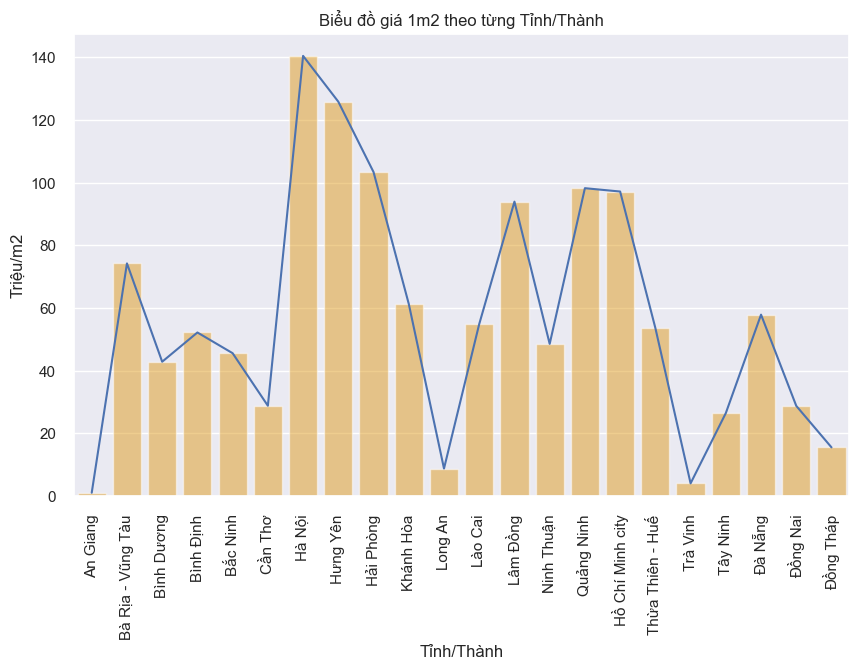

In [324]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Line chart
sns.lineplot(data=TinhThanh_df, x="Tỉnh/Thành", y="Triệu/m2", ax=ax)
ax.set_xlabel("Tỉnh/Thành")
ax.set_ylabel("Triệu/m2")
ax.set_title("Biểu đồ giá 1m2 theo từng Tỉnh/Thành")
ax.tick_params(axis='x', rotation=90)

# Column chart
sns.barplot(data=TinhThanh_df, x="Tỉnh/Thành", y="Triệu/m2", ax=ax, color="orange", alpha=0.5)

# Show the plot
plt.show()

In [325]:
fig = px.choropleth_mapbox(
    TinhThanh_df,
    geojson=vietnam,
    locations='id',
    color='Triệu/m2',
    hover_name='Tỉnh/Thành',
    hover_data=['Triệu/m2'],
    #featureidkey='properties.id',
    mapbox_style="carto-positron",
    center={"lat": 14.0583, "lon": 108.2772},  
    zoom=4,
    opacity=0.5,
    width=800,
    height=600,
    title="Giá 1m2"
)

# Chọn renderer phù hợp
pio.renderers.default = "vscode"  # Hoặc "notebook" nếu bạn dùng Jupyter notebook
fig.show()

*Nhận xét từ bản đồ vẽ được:*
- Mức giá cao nhất thuộc về Hà Nội khi cho mức giá trung mình 1m2 là khoảng 140 triệu
- Đứng thứ 2 là TP. Hồ Chí Minh với mức giá khoảng 97 triệu trên 1m2
- Việc không đủ dữ liệu về tất cả các tỉnh thành nên chỉ biểu diên được các tỉnh thành có dữ liệu. Có thể những tỉnh thành không đăng bán trên các trang bán  nhà trên website này 
- Các mức giá phân bố hợp lí khi mức giá cao tập trung tại các tỉnh thành là 2 thành phố lớn là Hà Nội và TP. Hồ Chí Minh còn các tỉnh thành còn lại đều cho ra mức giá giao động trung bình khoảng 20 - 40 triệu trên m2, vẫn có một số tỉnh thành thấp hơn nhưng nhìn chung phân bố cũng biểu hiện được rõ rệt giữa các tỉnh thành lớn nhỏ rõ ràng

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4398 entries, 2 to 9808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diện tích(m2)   4398 non-null   float64
 1   Số phòng ngủ    4398 non-null   float64
 2   Số phòng WC     4398 non-null   int32  
 3   Thời gian đăng  4398 non-null   object 
 4   Tỉnh/Thành      4398 non-null   object 
 5   Quận/Huyện      4398 non-null   object 
 6   Loại nhà        4398 non-null   object 
 7   Giá             4398 non-null   float64
dtypes: float64(3), int32(1), object(4)
memory usage: 292.1+ KB


### 2.4 Features Generate: sinh thêm các features để model có thêm dữ liệu cho mô hình máy học

In [327]:

df['Số phòng WC'] = df['Số phòng WC'].astype(float)
print(df['Số phòng WC'].dtype)

float64


In [328]:
df.head()

,Diện tích(m2),Số phòng ngủ,Số phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Giá
2,45.0,2.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,Bán Nhà,4.60
5,40.0,4.0,3.0,08/12/2023,Hà Nội,Hà Đông,Bán Nhà riêng,3.95
11,42.0,4.0,3.0,08/12/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,5.29
12,39.0,4.0,5.0,08/12/2023,Hà Nội,Ba Đình,Bán Nhà riêng,8.60
14,40.0,3.0,4.0,08/12/2023,Hà Nội,Cầu Giấy,Bán Nhà riêng,5.95


In [329]:
# features generate
def generate_feature(df):
  df['Số phòng'] = df['Số phòng ngủ'] + df['Số phòng WC']
  df['Tỷ lệ phòng ngủ/tổng số phòng'] = df['Số phòng ngủ'] / df['Số phòng']
  return df

df = generate_feature(df)
df.head()


,Diện tích(m2),Số phòng ngủ,Số phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng
2,45.0,2.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,Bán Nhà,4.60,4.0,0.500000
5,40.0,4.0,3.0,08/12/2023,Hà Nội,Hà Đông,Bán Nhà riêng,3.95,7.0,0.571429
11,42.0,4.0,3.0,08/12/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,5.29,7.0,0.571429
12,39.0,4.0,5.0,08/12/2023,Hà Nội,Ba Đình,Bán Nhà riêng,8.60,9.0,0.444444
14,40.0,3.0,4.0,08/12/2023,Hà Nội,Cầu Giấy,Bán Nhà riêng,5.95,7.0,0.428571


In [330]:
df.head()

,Diện tích(m2),Số phòng ngủ,Số phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng
2,45.0,2.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,Bán Nhà,4.60,4.0,0.500000
5,40.0,4.0,3.0,08/12/2023,Hà Nội,Hà Đông,Bán Nhà riêng,3.95,7.0,0.571429
11,42.0,4.0,3.0,08/12/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,5.29,7.0,0.571429
12,39.0,4.0,5.0,08/12/2023,Hà Nội,Ba Đình,Bán Nhà riêng,8.60,9.0,0.444444
14,40.0,3.0,4.0,08/12/2023,Hà Nội,Cầu Giấy,Bán Nhà riêng,5.95,7.0,0.428571


In [331]:
from sklearn.preprocessing import LabelEncoder

le_time = LabelEncoder()
df['Thời gian đăng'] = le_time.fit_transform(df['Thời gian đăng'])
le_city = LabelEncoder()
df['Tỉnh/Thành'] = le_city.fit_transform(df['Tỉnh/Thành'])
le_district = LabelEncoder()
df['Quận/Huyện'] = le_district.fit_transform(df['Quận/Huyện'])
le_house_type = LabelEncoder()
df['Loại nhà'] = le_house_type.fit_transform(df['Loại nhà'])

df.head()

,Diện tích(m2),Số phòng ngủ,Số phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng
2,45.0,2.0,2.0,76,15,42,1,4.60,4.0,0.500000
5,40.0,4.0,3.0,63,6,23,4,3.95,7.0,0.571429
11,42.0,4.0,3.0,63,6,71,4,5.29,7.0,0.571429
12,39.0,4.0,5.0,63,6,1,4,8.60,9.0,0.444444
14,40.0,3.0,4.0,63,6,11,4,5.95,7.0,0.428571


### 2.5 Scale dữ liệu về cùng tỉ lệ để đưa vào model

In [332]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
scaler = StandardScaler()

# Get the list of columns to be scaled
columns_to_scale = df.columns.tolist()
columns_to_scale.remove('Giá')

# Fit the scaler to the data and transform it
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the scaled data
df_scaled.head()


,Diện tích(m2),Số phòng ngủ,Số phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng
2,-0.564984,-0.824936,-0.794258,-0.516499,0.652178,0.123600,-4.041736,4.60,-0.877076,-0.217816
5,-0.776802,0.235903,-0.205889,-0.720078,-1.176174,-0.609943,0.435358,3.95,0.028625,0.741619
11,-0.692075,0.235903,-0.205889,-0.720078,-1.176174,1.243219,0.435358,5.29,0.028625,0.741619
12,-0.819166,0.235903,0.970849,-0.720078,-1.176174,-1.459309,0.435358,8.60,0.632425,-0.964044
14,-0.776802,-0.294517,0.382480,-0.720078,-1.176174,-1.073234,0.435358,5.95,0.028625,-1.177252


### 2.6 Trực quan các mối quan hệ bằng corelation matrix

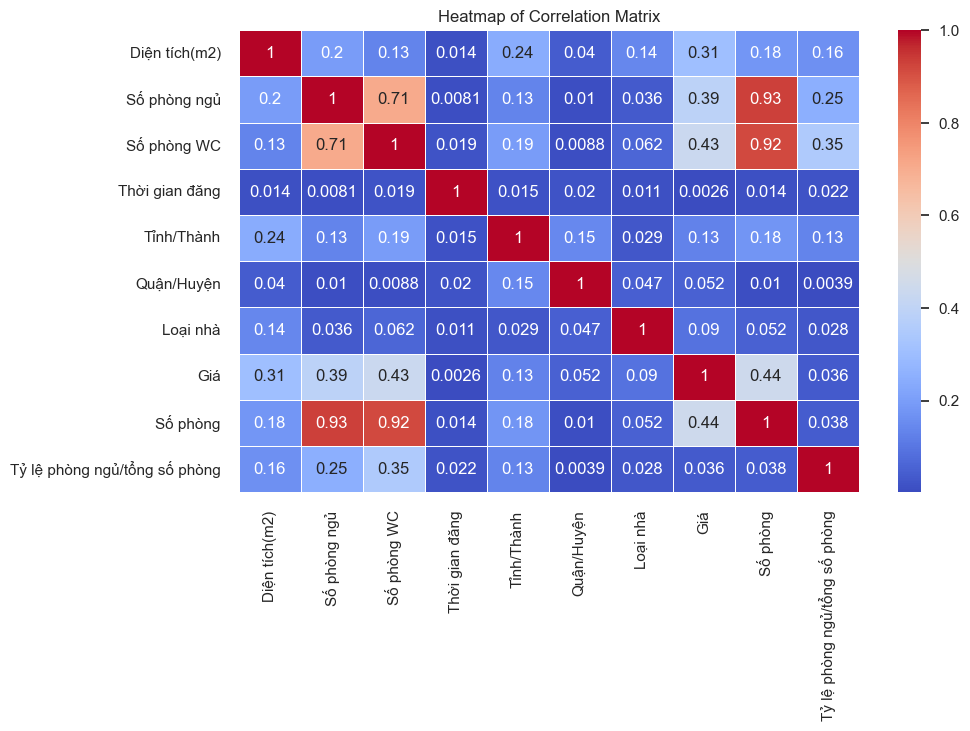

In [333]:

# Get the correlation matrix
correlation_matrix = df_scaled.corr().abs()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm')

# Set the title
plt.title('Heatmap of Correlation Matrix')

# Show the plot
plt.show()


In [334]:
df_scaled.drop(columns=['Thời gian đăng'], inplace=True)

In [335]:
X = df_scaled.drop(columns=['Giá']).values
y = df_scaled['Giá'].values

In [336]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
print(X_train.shape)
print(X_test.shape)

(3518, 8)
(880, 8)


### 2.7 Xây dựng model để dự đoán giá nhà

#### 2.7.1 Xây dựng model Regression bằng pytorch

In [338]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [339]:
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = HousePriceModel(input_dim)

In [340]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Huấn luyện model

In [341]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 11.5114
Epoch [200/1000], Loss: 8.9936
Epoch [300/1000], Loss: 8.2142
Epoch [400/1000], Loss: 7.6986
Epoch [500/1000], Loss: 7.1608
Epoch [600/1000], Loss: 6.8427
Epoch [700/1000], Loss: 6.4599
Epoch [800/1000], Loss: 6.0658
Epoch [900/1000], Loss: 5.9559
Epoch [1000/1000], Loss: 5.7834


In [342]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train_tensor)

    mse = mean_squared_error(y_train_tensor.numpy(), y_pred.numpy())
    mae = mean_absolute_error(y_train_tensor.numpy(), y_pred.numpy())
    r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())

print("Evaluation on train set:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Evaluation on train set:
Mean Squared Error: 5.074206352233887
Mean Absolute Error: 1.5548937320709229
R² Score: 0.5461580997476604


In [343]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

    mse = mean_squared_error(y_test_tensor.numpy(), y_pred.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), y_pred.numpy())
    r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())

print("Evaluation on test set:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Evaluation on test set:
Mean Squared Error: 5.788742542266846
Mean Absolute Error: 1.6484863758087158
R² Score: 0.48888606946254554


#### 2.7.2 Sử dụng một số model Regression khác

In [344]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [345]:
# Define list of models
models = [
    LinearRegression(),
    Ridge(alpha=0.1, random_state=42),
    Lasso(alpha=0.1, random_state=42)
]
for model in models:
    model.fit(X_train, y_train)

    # Evaluate model on training data
    train_preds = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)

    # Evaluate model on test data
    test_preds = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_r2 = r2_score(y_test, test_preds)

    print(f"Model: {model.__class__.__name__}")
    print("Training performance:")
    print(f"MSE: {train_mse:.4f}")
    print(f"MAE: {train_mae:.4f}")
    print(f"R2-score: {train_r2:.4f}")
    print("Testing performance:")
    print(f"MSE: {test_mse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print(f"R2-score: {test_r2:.4f}")
    print()

Model: LinearRegression
Training performance:
MSE: 8.1544
MAE: 2.0409
R2-score: 0.2707
Testing performance:
MSE: 8.1695
MAE: 2.0349
R2-score: 0.2787

Model: Ridge
Training performance:
MSE: 8.1548
MAE: 2.0407
R2-score: 0.2706
Testing performance:
MSE: 8.1476
MAE: 2.0322
R2-score: 0.2806

Model: Lasso
Training performance:
MSE: 8.2040
MAE: 2.0467
R2-score: 0.2662
Testing performance:
MSE: 8.2236
MAE: 2.0414
R2-score: 0.2739



- Các mô hình hồi quy đơn giản được sử dụng cho ra kết quả rất thấp chot thấy đang bị underfitting nên sẽ giải quyết bằng cách dùng các mô hình khác
- Sử dụng các model như ensemble learning như Random Forest Regressor hay các mô hình Boosting sẽ giúp giải quyết vấn đề phù hợp với model với các dữ liệu đầu vào

In [346]:
# Using Random Forest Regressor model

# Define a list of hyperparameters to experiment with
hyperparameters = {
    'max_depth': [None, 1, 3, 5, 7, 10]
}

# Initialize an empty list to store the results
results = []

# Loop over each combination of hyperparameters

for max_depth in hyperparameters['max_depth']:
   # Create a new DecisionTreeRegressor object with the current hyperparameters
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the train data
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate the model on the test data
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store the results in a dictionary
    results.append({
        'max_depth': max_depth,
        'mse-test': mse_test,
        'mae-test': mae_test,
        'r2-test': r2_test,
        'mse-train': mse_test,
        'mae-train': mae_train,
        'r2-train': r2_train
    })


# Print the results
for result in results:
    print(result)


{'max_depth': None, 'mse-test': 4.876387286908866, 'mae-test': 1.4835663206909477, 'r2-test': 0.5694420124744578, 'mse-train': 4.876387286908866, 'mae-train': 0.640214073305071, 'r2-train': 0.9204118549818554}
{'max_depth': 1, 'mse-test': 8.37799687487887, 'mae-test': 2.1445212783673915, 'r2-test': 0.2602692809845022, 'mse-train': 8.37799687487887, 'mae-train': 2.144413008865129, 'r2-train': 0.24491008279816073}
{'max_depth': 3, 'mse-test': 7.0876490885156604, 'mae-test': 1.918436861877367, 'r2-test': 0.3741998433900072, 'mse-train': 7.0876490885156604, 'mae-train': 1.8651827983635716, 'r2-train': 0.4010953393443729}
{'max_depth': 5, 'mse-test': 5.922633464396168, 'mae-test': 1.6982156846763894, 'r2-test': 0.4770642700739406, 'mse-train': 5.922633464396168, 'mae-train': 1.6345980532892874, 'r2-train': 0.5211764236367913}
{'max_depth': 7, 'mse-test': 5.2937885531495255, 'mae-test': 1.5871548269918656, 'r2-test': 0.5325877926167252, 'mse-train': 5.2937885531495255, 'mae-train': 1.4381959

*Có thể nhận thấy rằng với max_depth=5 cho ra kết quả tốt nhất vì điểm đánh giá trên cả train và test đêu không có quá nhiều chênh lệch nên sẽ tránh được Overfitting*

 Điểm số mà Decision Tree cải thiện so với các mô hình hồi quy trên  cũng rất ấn tượng khi cho kết quả vói max_depth=5 trên tập test cho ra điểm r2-score=0.47 và mse=5.92

In [347]:

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the training data
train_preds = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Evaluate the model on the test data
test_preds = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Model: {model.__class__.__name__}")
print("Training performance:")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R2-score: {train_r2:.4f}")
print("Testing performance:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2-score: {test_r2:.4f}")


Model: GradientBoostingRegressor
Training performance:
MSE: 4.3280
MAE: 1.4505
R2-score: 0.6129
Testing performance:
MSE: 4.9134
MAE: 1.5542
R2-score: 0.5662


In [348]:

# Define the base models
base_models = [
    ("lr", LinearRegression()),
    ("ridge", Ridge(alpha=1)),
    ("lasso", Lasso(alpha=0.01)),
    ("dt", DecisionTreeRegressor(random_state=42, max_depth=3)),
    ("rf", RandomForestRegressor(random_state=42, max_depth=3)),
    ("gb", GradientBoostingRegressor()),
]

# Define the meta model
meta_model = LinearRegression()

# Create the StackingRegressor model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)


# Train the models
stacking_model.fit(X_train, y_train)

# Evaluate the models on the train set
y_pred_train_stacking = stacking_model.predict(X_train)

mse_train_stacking = mean_squared_error(y_train, y_pred_train_stacking)
mae_train_stacking = mean_absolute_error(y_train, y_pred_train_stacking)
r2_train_stacking = r2_score(y_train, y_pred_train_stacking)

# Evaluate the models on the test set
y_pred_test_stacking = stacking_model.predict(X_test)

mse_test_stacking = mean_squared_error(y_test, y_pred_test_stacking)
mae_test_stacking = mean_absolute_error(y_test, y_pred_test_stacking)
r2_test_stacking = r2_score(y_test, y_pred_test_stacking)

# Print the results
print("StackingRegressor:")
print("Train:")
print(f"MSE: {mse_train_stacking:.4f}")
print(f"MAE: {mae_train_stacking:.4f}")
print(f"R2-score: {r2_train_stacking:.4f}")
print("Test:")
print(f"MSE: {mse_test_stacking:.4f}")
print(f"MAE: {mae_test_stacking:.4f}")
print(f"R2-score: {r2_test_stacking:.4f}")



StackingRegressor:
Train:
MSE: 4.1564
MAE: 1.4231
R2-score: 0.6282
Test:
MSE: 4.7838
MAE: 1.5472
R2-score: 0.5776


<Figure size 800x600 with 0 Axes>

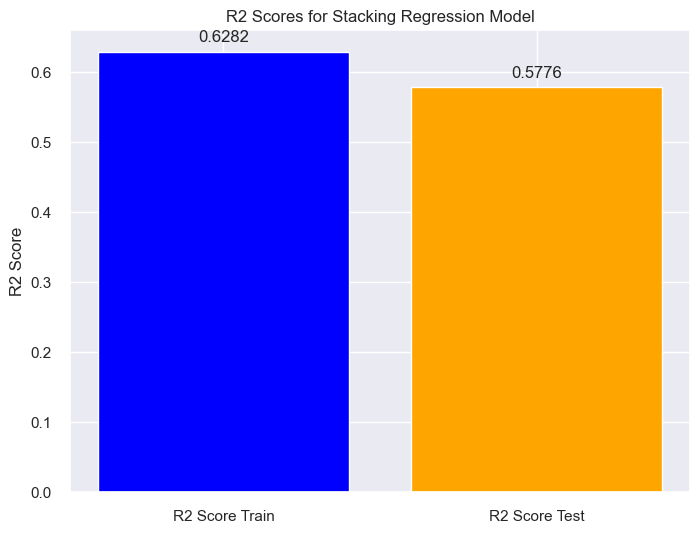

In [349]:
# Plot the results
plt.figure(figsize=(8,6))
models = 'StackingRegressor'
# Tạo danh sách các giá trị
scores = [r2_train_stacking, r2_test_stacking]

# Tạo danh sách các nhãn
labels = ['R2 Score Train', 'R2 Score Test']

# Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'orange'])

# Thêm tiêu đề và nhãn trục
plt.title('R2 Scores for Stacking Regression Model')
plt.ylabel('R2 Score')

# Hiển thị giá trị trên đỉnh của các cột
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

- Hiệu suất tốt trên tập huấn luyện: Mô hình đạt điểm R² là 0.6282 trên tập huấn luyện, cho thấy mô hình đã học được khá tốt các đặc trưng và mối quan hệ trong dữ liệu huấn luyện.

- Hiệu suất giảm trên tập kiểm tra: Điểm R² giảm xuống 0.5776 trên tập kiểm tra. Điều này cho thấy mô hình có thể bị overfitting một chút, tức là nó đã học quá chi tiết các đặc trưng của tập huấn luyện và không tổng quát hóa tốt cho dữ liệu mới.

- Khả năng dự đoán chấp nhận được: Mặc dù có sự giảm nhẹ về hiệu suất trên tập kiểm tra, điểm R² vẫn ở mức chấp nhận được, cho thấy mô hình vẫn có khả năng dự đoán khá tốt trên dữ liệu mới.

In [350]:
from xgboost import XGBRegressor

# Define the XGBRegressor model
xgb_model = XGBRegressor(n_estimators=100, max_depth=2, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate the model on the train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Train set:")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R2-score: {r2_train:.4f}")

print("\nTest set:")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R2-score: {r2_test:.4f}")


Train set:
MSE: 4.2885
MAE: 1.4415
R2-score: 0.6164

Test set:
MSE: 4.7739
MAE: 1.5375
R2-score: 0.5785


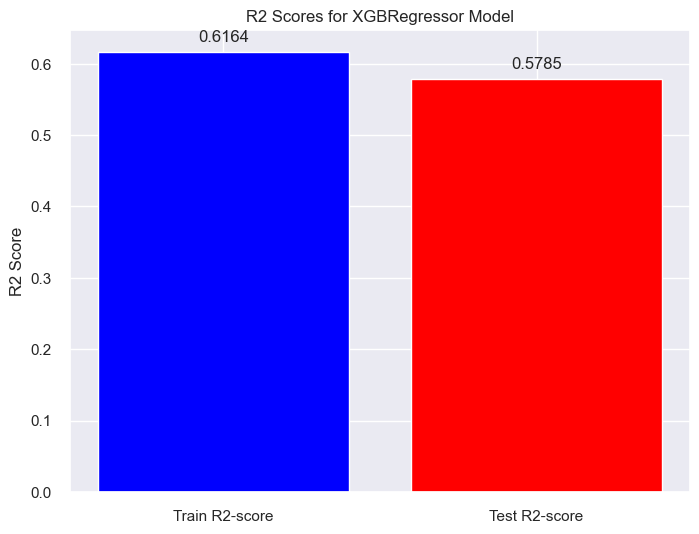

In [351]:
# Giá trị R2-score
r2_scores = [r2_train, r2_test]

# Nhãn cho các cột
labels = ['Train R2-score', 'Test R2-score']

# Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(labels, r2_scores, color=['blue', 'red'])

# Thêm tiêu đề và nhãn trục
plt.title('R2 Scores for XGBRegressor Model')
plt.ylabel('R2 Score')

# Hiển thị giá trị trên đỉnh của các cột
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

- Hiệu suất tốt trên tập huấn luyện: Mô hình đạt điểm R² là 0.6164 trên tập huấn luyện, cho thấy mô hình đã học được khá tốt các đặc trưng và mối quan hệ trong dữ liệu huấn luyện.

- Hiệu suất giảm trên tập kiểm tra: Điểm R² giảm xuống 0.5785 trên tập kiểm tra. Điều này cho thấy mô hình có thể bị overfitting một chút, tức là nó đã học quá chi tiết các đặc trưng của tập huấn luyện và không tổng quát hóa tốt cho dữ liệu mới.

- Khả năng dự đoán chấp nhận được: Mặc dù có sự giảm nhẹ về hiệu suất trên tập kiểm tra, điểm R² vẫn ở mức chấp nhận được, cho thấy mô hình vẫn có khả năng dự đoán khá tốt trên dữ liệu mới.

### 3. Model selection: 
- Việc lựa chọn model cũng rất quan trọng để có thể có 1 model phù hợp với dữ liệu đầu vào
- Từ các model đã thử nghiệm bên trên thì model XGBoost cho ra kết quả phù hợp nhất khi mức chênh lệch giữa tập train và test tương đối thấp nhưng cũng đồng thời cho ra kết quả dự đoán đã tối ưu khi điểm R2-score = 0.5727

Hyperparameter tuning cho các tham số của model đẫ chọn

In [352]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình
model = XGBRegressor()

# Định nghĩa lưới các tham số cần thử
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5]
}

# Sử dụng GridSearchCV để tìm kiếm
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Huấn luyện mô hình
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất và điểm số tương ứng
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')
print(f'Best R2 score: {grid_search.best_score_}')


Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
Best R2 score: 0.5576938443741201


### 4. Conclusion:

In [353]:

# Tạo mô hình mới với các tham số tốt nhất
best_model = XGBRegressor(**best_params)

# Huấn luyện lại mô hình với toàn bộ dữ liệu huấn luyện
best_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Đánh giá mô hình trên tập huấn luyện và tập kiểm tra
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# In kết quả
print("Train set:")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R2-score: {r2_train:.4f}")

print("\nTest set:")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R2-score: {r2_test:.4f}")



Train set:
MSE: 4.4022
MAE: 1.4626
R2-score: 0.6063

Test set:
MSE: 4.9372
MAE: 1.5532
R2-score: 0.5641


- Mô hình có khả năng dự đoán tốt: Các giá trị R-squared trên cả tập huấn luyện và tập kiểm tra đều trên 0.5, cho thấy mô hình có khả năng giải thích một phần đáng kể sự biến thiên của biến mục tiêu.

- Sai số dự báo chấp nhận được: Các giá trị MSE và MAE không quá lớn, cho thấy sai số dự báo của mô hình là chấp nhận được.

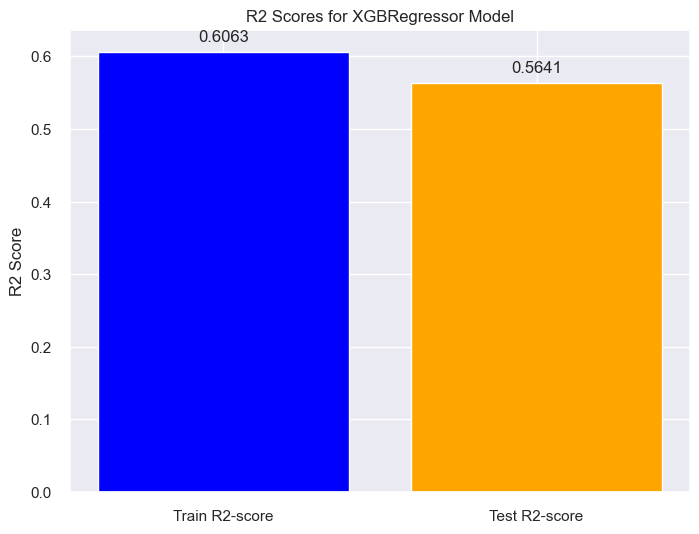

In [354]:
# Vẽ biểu đồ cột trực quan điểm R2-score của tập train và test
import matplotlib.pyplot as plt

# Giá trị R2-score
r2_scores = [r2_train, r2_test]

# Nhãn cho các cột
labels = ['Train R2-score', 'Test R2-score']

# Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(labels, r2_scores, color=['blue', 'orange'])

# Thêm tiêu đề và nhãn trục
plt.title('R2 Scores for XGBRegressor Model')
plt.ylabel('R2 Score')

# Hiển thị giá trị trên đỉnh của các cột
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

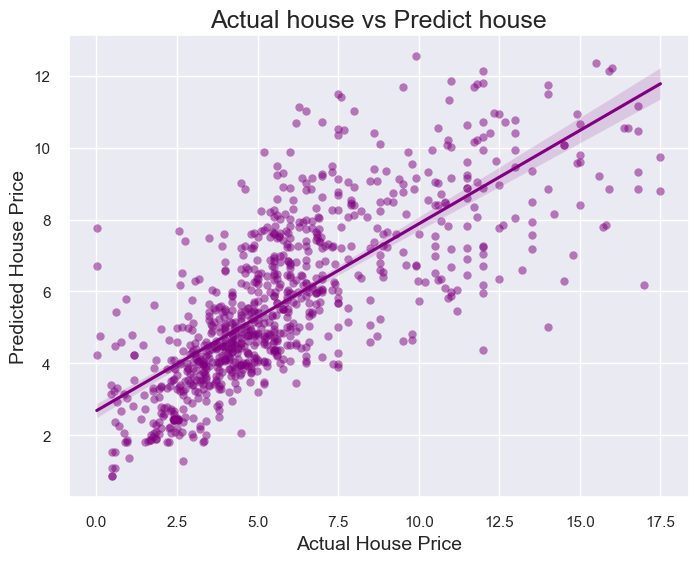

In [355]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha': 0.5}, color = 'purple')
plt.xlabel("Actual House Price", fontsize=14)
plt.ylabel("Predicted House Price", fontsize=14)
plt.title("Actual house vs Predict house", fontsize=18)
plt.show()

- Phân bố: Các điểm dữ liệu tập trung xung quanh đường chéo, cho thấy mô hình dự đoán giá nhà khá tốt. Tuy nhiên, vẫn có một số điểm dữ liệu nằm xa đường chéo, đặc biệt là đối với những ngôi nhà có giá trị cao hơn. Điều này cho thấy mô hình có thể gặp khó khăn trong việc dự đoán giá của những ngôi nhà đắt tiền

- Xu hướng: Có một xu hướng tuyến tính rõ ràng giữa giá nhà thực tế và giá nhà dự đoán. Điều này cho thấy mô hình có thể đã nắm bắt được mối quan hệ cơ bản giữa các yếu tố ảnh hưởng đến giá nhà

- Sai số: Mặc dù có xu hướng tuyến tính, vẫn có sự phân tán nhất định của các điểm dữ liệu xung quanh đường chéo. Điều này cho thấy mô hình không hoàn hảo và vẫn có sai số trong dự đoán

In [356]:
xgb = XGBRegressor(**best_params)

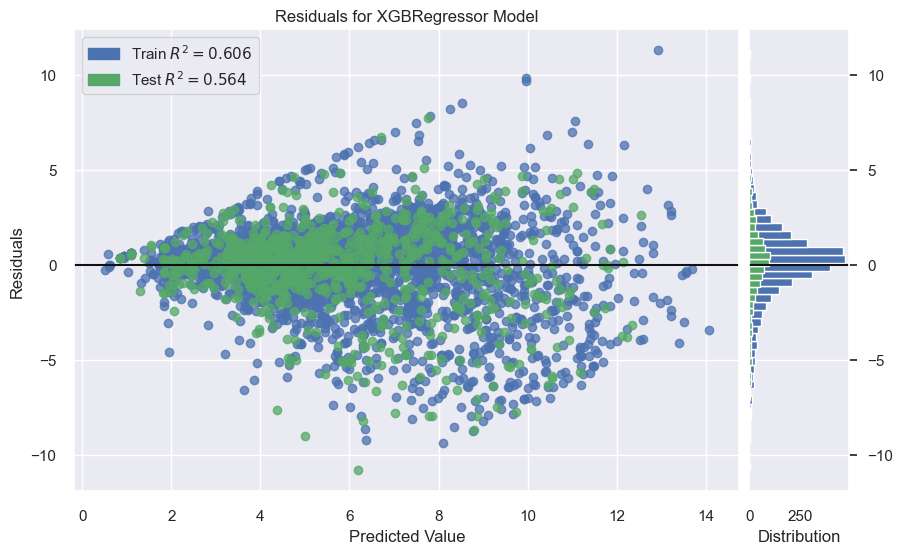

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [357]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(estimator=xgb)
visualizer.fit(X=X_train, y=y_train)
visualizer.score(X=X_test, y=y_test)
visualizer.poof()

- Phân bố phần dư: Phần dư tập trung xung quanh giá trị 0, cho thấy mô hình dự đoán khá tốt. Tuy nhiên, vẫn có một số điểm dữ liệu có giá trị phần dư lớn (âm hoặc dương), đặc biệt là đối với các giá trị dự đoán nằm trong khoảng 5-12. Điều này cho thấy mô hình có thể gặp khó khăn trong việc dự đoán một số trường hợp cụ thể
- Phương sai không đổi: Phần dư có vẻ phân tán đồng đều trên toàn bộ phạm vi giá trị dự đoán. Điều này cho thấy mô hình không có vấn đề về phương sai không đổi
- Tính tuyến tính: Không có xu hướng rõ ràng giữa phần dư và giá trị dự đoán, cho thấy mô hình đã nắm bắt được mối quan hệ tuyến tính giữa các biến
- R-squared: Giá trị R² cho tập huấn luyện (0.606) và tập kiểm tra (0.564) không quá cao. Sự khác biệt không lớn giữa R² của tập huấn luyện và tập kiểm tra cho thấy mô hình không bị overfitting

Phân tán rộng: Sự phân tán rộng của các điểm dữ liệu xung quanh đường hồi quy cho thấy mô hình hiện tại chưa giải thích được hết sự biến động của giá nhà. Có nhiều yếu tố khác ngoài các yếu tố đã được đưa vào mô hình có thể ảnh hưởng đến giá nhà, dẫn đến sai số dự báo lớn.

Độ chính xác thấp: Do sự phân tán rộng, mô hình có thể có độ chính xác dự báo thấp, đặc biệt là đối với những ngôi nhà có giá trị cao hoặc thấp hơn nhiều so với mức trung bình.


# Phần kết luận:

Về mặt kỹ thuật:

- Lựa chọn mô hình: Không có mô hình nào là hoàn hảo cho mọi bài toán. Cần phải hiểu rõ ưu nhược điểm của từng mô hình (XGBoost, hồi quy tuyến tính,...) để lựa chọn phù hợp với đặc điểm dữ liệu và yêu cầu bài toán.
- Tinh chỉnh siêu tham số: Việc điều chỉnh các siêu tham số của mô hình có ảnh hưởng lớn đến hiệu suất dự đoán. Cần phải thử nghiệm và tìm kiếm các giá trị tối ưu để đạt được kết quả tốt nhất.
- Xử lý overfitting: Overfitting là một vấn đề thường gặp trong học máy, đặc biệt là với các mô hình phức tạp như XGBoost. Cần phải áp dụng các kỹ thuật như regularization, cross-validation để giảm thiểu overfitting và đảm bảo mô hình tổng quát hóa tốt.
- Đánh giá mô hình: Việc sử dụng các chỉ số đánh giá phù hợp (R-squared, MSE, MAE) và phân tích các biểu đồ (biểu đồ phân tán, biểu đồ phần dư) là rất quan trọng để hiểu rõ về hiệu suất của mô hình và phát hiện các vấn đề tiềm ẩn.


Về mặt dữ liệu:

- Chất lượng dữ liệu: Chất lượng dữ liệu đầu vào ảnh hưởng trực tiếp đến chất lượng của mô hình dự đoán. Dữ liệu cần phải được làm sạch, xử lý các giá trị thiếu, ngoại lệ, và chuẩn hóa trước khi đưa vào huấn luyện mô hình.
- Lựa chọn đặc trưng: Việc lựa chọn các đặc trưng phù hợp (diện tích, số phòng ngủ, vị trí,...) là rất quan trọng để xây dựng một mô hình hiệu quả. Cần phải hiểu rõ về các yếu tố ảnh hưởng đến giá nhà và lựa chọn các đặc trưng có khả năng giải thích tốt nhất sự biến động của giá nhà.
- Khai thác dữ liệu: Có thể sử dụng các kỹ thuật khai phá dữ liệu như phân tích tương quan để tìm ra các mối quan hệ ẩn giữa các biến và tạo ra các đặc trưng mới có giá trị.


Về mặt nghiệp vụ:

- Hiểu rõ bài toán: Cần phải có sự hiểu biết sâu sắc về thị trường bất động sản, các yếu tố ảnh hưởng đến giá nhà, và mục tiêu của việc dự đoán giá nhà để có thể xây dựng một mô hình hiệu quả và có giá trị thực tiễn.
- Giải thích kết quả: Việc giải thích kết quả dự đoán và các yếu tố ảnh hưởng đến giá nhà là rất quan trọng để giúp người dùng hiểu rõ và tin tưởng vào mô hình.
- Ứng dụng thực tế: Mô hình dự đoán giá nhà có thể được ứng dụng trong nhiều lĩnh vực như định giá bất động sản, tư vấn đầu tư, quản lý tài sản, v.v.


#### Tổng kết: Việc dự đoán giá nhà bằng mô hình máy học là một bài toán thú vị và đầy thách thức. Qua quá trình này, chúng em không chỉ học được các kiến thức về kỹ thuật, dữ liệu mà còn cả về nghiệp vụ, cách làm việc nhóm và cách áp dụng máy học vào thực tế.